# Day 2 PM // Eigendecomposition (Faktorisasi Matriks)

## Faktorisasi Matriks

Faktorisasi disebut juga memfaktorkan angka. Misalnya, angka 8. Faktorisasi dari angka 8 adalah:

- 1 x 8
- 2 x 4
- 4 x 2
- 8 x 1

Dalam pembahasan ini, yang difaktorisasi adalah matriks. Contoh:

A == B * C, B * C adalah faktorisasi dari A.

Salah satu kegunaan dari dekomposisi matrik adalah sistem rekomendasi yang ada di *e-commerce*.

## Brief Linear Transformation

### Real Space atau Bilangan Riil

Kita dapat mengambil analogi fungsi y=f(x) untuk memahami transformasi linier. Transformasi linier adalah mentransformasi angka ke dalam bentuk angka yang lain.

f:X --> Y; f(x) = y

Artinya, f memetakan domain (X) ke range (Y) dengan formulasi f(x) = y

Misalnya : x    = {1,2} --> himpunan
           f(x) = 2x
           Maka:
           f(1) = 2
           f(2) = 4

           y    = f(x) = x^2
           x    = {1,2,3}
           y    = {1,4,9}

### Vector Space

Transformasi vektor menggunakan perkalian matriks.

T:V --> W; T(v) = w

v = [1,2]
T = [x, x+y]
W = [1, 3]

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

In [65]:
X = np.array([2, 5])
Y = np.array([3, 1])

In [66]:
from numpy.linalg import norm

norm(X-Y)

4.123105625617661

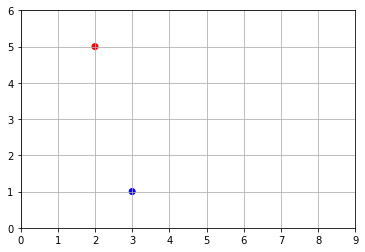

In [67]:
# Representasi Vektor untuk Aljabar Linier
## Mencari titik koordinat

### X = [2, 5], horizontal 2, vertikal 5
### Y = [3, 1], horizontal 3, vertikal 1

x_coords, y_coords = zip(X, Y)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()

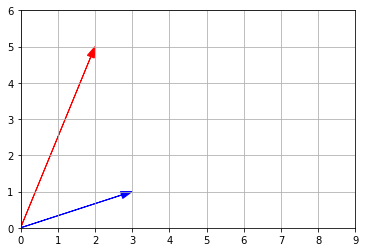

In [68]:
## Membuat garis ke titik koordinat
### Melihat arah dari vektor

plot_vector2d(X, color="r")
plot_vector2d(Y, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()

### Matriks Transformasi

<img src='https://i1.wp.com/rumushitung.com/wp-content/uploads/2015/04/matriks-transformasi-lengkap.png?ssl=1' />

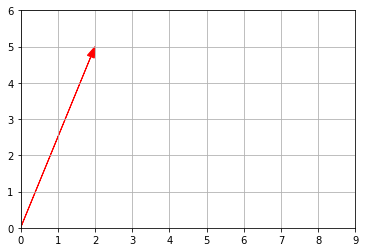

In [69]:
### Mentransformasikan vektor Z ke bentuk garis

T = np.array([2,5])
plot_vector2d(T, color="r")
plt.axis([0,9,0,6])
plt.grid()

T : V --> W

Artinya, T mentransformasi kan V ke W. Caranya adalah dengan mengkalikan transformasi matriks dengan vektornya

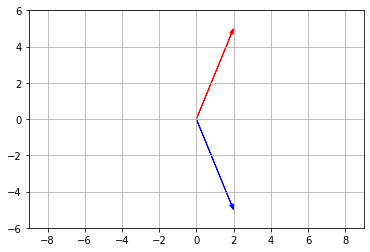

In [70]:
## Transformasi Matriks
### Mentransformasikan matriks T ke W, W = perkalian dari V (pencerminan terhadap sumbu x) dengan vektor T

T = np.array([2,5])
V = np.array([[1,0],   
              [0,-1]])
W = V @ T
plot_vector2d(T, color="r") # merah adalah vektor T
plot_vector2d(W, color="b") # biru adalah W (hasil pencerminan vektor T)
plt.axis([-9,9,-6,6])
plt.grid()

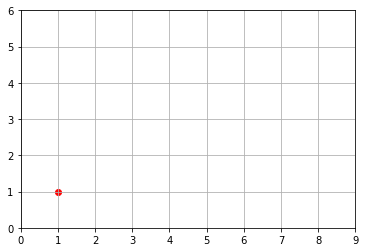

In [71]:
### Mentransformasikan Vektor 1,1 (x=1, y=1)

A = np.array([1,1])
plt.scatter([1], [1], color=["r"])
plt.axis([0, 9, 0, 6])
plt.grid()

In [72]:
### Mendefinisikan Vektor A' (A_t)

A = np.array([1,1])
M = np.array([[1,2], 
             [2,4]])
A_trans = M @ A # a transformasi
print(f"a = {A} \na' = {A_trans}")

a = [1 1] 
a' = [3 6]


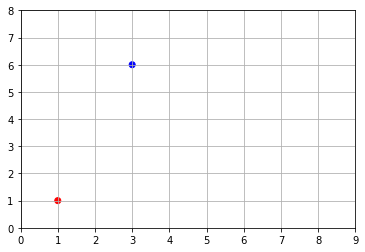

In [73]:
### Membuat Scatter Plot / titik koordinat A dan A' (A_t)

x_coords, y_coords = zip(A, A_trans)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 8])
plt.grid()

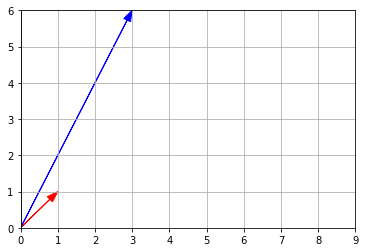

In [74]:
### Membuat Garis Vektor A dan A' (A_t)

plot_vector2d(A, color="r")
plot_vector2d(A_trans, color="b")
plt.plot([0,0], [-6,6], color='green')
plt.axis([0, 9, 0, 6])
plt.grid()

Dua titik A dan A_trans tidak searah karena tidak bisa diambil garis lurus

In [75]:
### Mendefinisikan Vektor B dan B' (B_trans)

B = np.array([1,2])
M = np.array([[1,2], [2,4]])
B_trans = M @ B
print(f"B : {A} \nB : {B_trans}")

B : [1 1] 
B : [ 5 10]


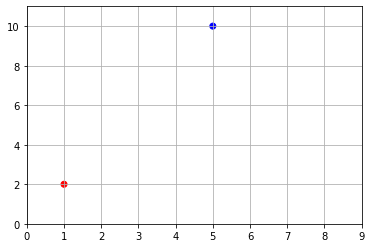

In [76]:
### Membuat Garis Vektor B dan B' (B_trans)

x_coords, y_coords = zip(b, b_trans)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 11])
plt.grid()

# searah karena bisa diambil garis lurus

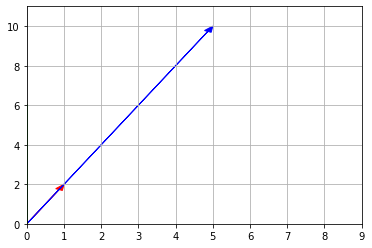

In [77]:
### Membuat Garis Vektor B dan B' (B_trans)

plot_vector2d(B, color="r")
plot_vector2d(B_trans, color="b")
plt.plot([0,0], [-6,6], color='green')
plt.axis([0, 9, 0, 11])
plt.grid()

Dua titik B dan B_trans searah karena bisa diambil garis lurus. B_trans 5x lebih panjang dari B yang biasa, tapi arahnya sama.

## Eigen Vector & Value

Ketika kita menemukan sebuah vektor, yang jika kita kalikan vektor tersebut dengan sebuah matriks dan menghasilkan bentuk seperti

T (v) = 5 v 

maka, 5 adalah nilai eigen, dan v adalah vektor eigennya.

<img src='https://www.mathsisfun.com/algebra/images/eigenvalue.svg' />

- Vektor eigen adalah vektor yang diperkecil saja tanpa diputar.
- Nilai eigen adalah besaran skala vektor. Bisa angka riil, desimal, bahkan imajiner.

### Bagaimana cara mencari vektor eigen dan nilai matriks?

Mencari vektor dan nilai eigen disebut juga dengan mencari dekomposisi eigen. Dengan kata lain, *eigendecomposition* adalah proses untuk menguraikan suatu matriks menjadi vektor eigen dan nilai eigen.

Rumus yang digunakan :
-          Ax = λx
-          Ax = λIx
-    Ax - λIx = 0
-  (A - λI) X = 0
- det(A − λI) = 0

<img src='https://miro.medium.com/max/1838/1*22aZVF72wrfKMIz4ANvXpw.png' />

## *Eigendecomposition*

Dekomposisi eigen merupakan salah satu bentuk dekomposisi/faktorisasi matriks. Mengurai matriks berarti kita ingin mencari hasil kali matriks yang sama dengan matriks awal. Dalam kasus dekomposisi eigen, kita dapat menguraikan matriks awal menjadi produk dari eigen vector dan eigen valuenya.

In [78]:
# Eigendecomposition

import numpy as np
from numpy.linalg import eig

## Pendefinisian Matriks
A = np.array([[1,2], [2,4]])

## Faktorisasi
eigval, eigvec = eig(A)

In [79]:
## Menampilkan nilai eigen value

eigval

array([0., 5.])

In [80]:
## Menampilkan nilai eigen vector

eigvec

array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]])

Nilai dari eigen vector adalah nilai satuan atau nilai unit, nilai yang panjangnya adalah satu.

In [81]:
# Mencari panjang vektor a

from numpy.linalg import norm
a = np.array([1,2])
norm(a) 

2.23606797749979

In [82]:
# Memastikan nilai norm(a) benar atau tidak

## |a| = akar (1^2 + 2^2)
## Hasilnya akar 5

np.sqrt(5)

2.23606797749979

In [83]:
# Memastikan nilai eigen vector

a / np.sqrt(5)

array([0.4472136 , 0.89442719])

### Rekonstruksi Matriks

Untuk menemukan vektor eigen dan nilai matriks, kita membagi matriks menjadi vektor dan nilai eigen juga. Namun, bagaimana cara merekonstruksi matriks ke versi awal?

In [84]:
eigval

array([0., 5.])

In [85]:
# Rekonstruksi Matriks EIgval

from numpy import diag
from numpy.linalg import inv
diag(eigval)

array([[0., 0.],
       [0., 5.]])

In [86]:
## Menampilkan Nilai Eigen Vector

eigvec

array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]])

In [87]:
eigval

array([0., 5.])

In [88]:
## Mendefinisikan Rekonstruksi Matriks

B = eigvec @ diag(eigval) @ inv(eigvec)
B

array([[1., 2.],
       [2., 4.]])

In [89]:
## Mendefinisikan Rekonstruksi Matriks
## Cara lain:

B = eigvec.dot(diag(eigval)).dot(inv(eigvec))
B

array([[1., 2.],
       [2., 4.]])

In [90]:
# Menampilkan Matriks A

A

array([[1, 2],
       [2, 4]])

In [91]:
# studi kasus

N = [[0, 0, 0, 1, 0, 0],
     [0.25, 0, 0, 0, 0, 0],
     [0.25, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0],
     [0.25, 0, 0, 0, 0, 0],
     [0.25, 1, 1, 0, 0, 0]]
N = np.array(N)

In [92]:
N

array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 1.  , 1.  , 0.  , 0.  , 0.  ]])

In [93]:
eigval, eigvec = eig(N)

In [94]:
eigval.argmax()

5

In [95]:
eigvec[5]

array([ 1.        +0.j, -1.        +0.j, -1.        +0.j,  0.63225405+0.j,
        0.63225405-0.j, -0.77128308+0.j])

In [96]:
eigvec[5].argmax()

0

In [97]:
# ======
a = np.array([1,3,2,10,4])

In [98]:
a.argmax()

3

In [99]:
a.max()

10

In [100]:
angka_1, angka_2 = 5*2, 1*4

In [101]:
angka_1

10

In [102]:
angka_2

4

Eigendecomposition bisa dianalogikan seperti "Nasi Goreng"

Vektor dan nilai eigen banyak digunakan dalam ilmu komputer. Dalam ilmu data itu sendiri, konsep eigen sangat berguna untuk Analisis Komponen Utama. Selain itu, eigen juga diimplementasikan di Google Search Engine